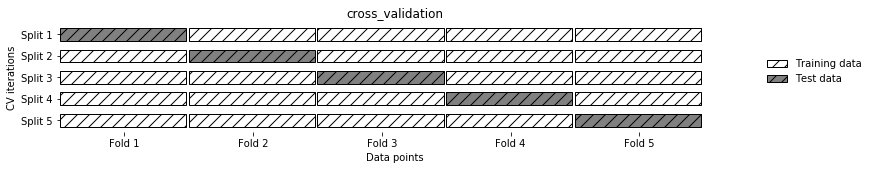

In [2]:
# 交叉验证 是一种评估泛化能力的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面，
# 在交叉验证中，数据被多次划分，并且需要训练多个模型
# 其中常用的交叉验证是 k折交叉验证，k通常取5或10，首先将数据划分为大致相等的k部分,
# 每一部分叫作折，使用第1折作为测试集，其它折作为训练集，在1折上评估精度，对这k次划分训练
# k个模型得到k个精度，通常来说，数据的前k分之一是第1折，第二个k分之一是第2折,以此类推
%matplotlib inline
import mglearn
mglearn.plots.plot_cross_validation()

In [19]:
# scikit-learn是利用model_selection模块中的cross_val_score函数来实现交叉验证
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
# cv参数设置k的数量
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores:{}".format(scores))

Cross-validation scores:[0.96666667 1.         0.93333333 0.96666667 1.        ]


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
# 总结交叉验证精度的一个常用方法是计算平均值
print("Average cross-validation score:{:.2f}".format(scores.mean()))

Average cross-validation score:0.97


In [10]:
# 交叉验证避免了数据单次随机划分的巧合性，告诉我们模型应用于新数据时最好、最坏的可能表现
# 缺点是增加了计算成本，需要训练k个模型
#　交叉验证不是一种构建可应用于新数据的模型方法，不会返回一个模型，目的只是评估给定算法
# 在特定数据集上训练后的泛化性能好坏

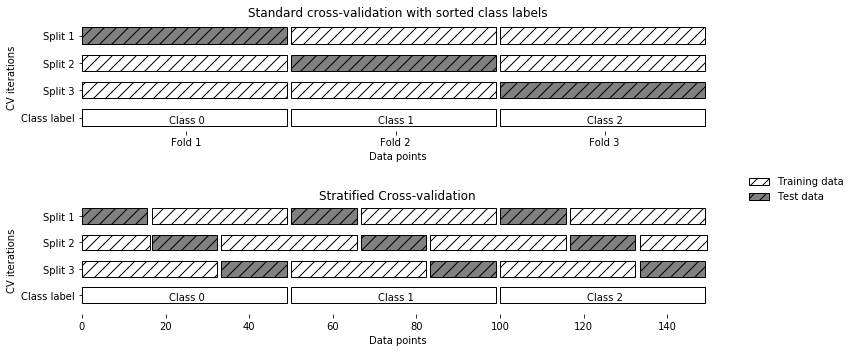

In [11]:
# 分层k折交叉验证和其他策略，使每个折中类别之间的比例与整个数据集中的比例相同
# 有些数据集k折交叉验证并不适用，如鸢尾花数据类别前三分之一都是0，中间都是1，后边都是2
mglearn.plots.plot_stratified_cross_validation()

In [12]:
# scikit-learn在分类问题中使用分层k折交叉验证，在回归问题中默认使用k折交叉验证

In [21]:
# cv参数设置cross_val_score所使用的折数，允许值为交叉验证分离器，可使划分过程更精细
# 将KFold分离器作为cv参数
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data,
                                                iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

In [23]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data,
                                                iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [25]:
# 在iris数据集上使用3折交叉验证确实很糟糕，除了分层，还可以将数据打乱来代替分层，
# 设置KFold的shuffle参数为True来打乱数据
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data,
                                                iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

In [31]:
# 留一法交叉验证 可以看作是每折只包含单个样本的k折交叉验证，每次划分选单个数据点做测试集
# 这种方法非常耗时，但在小型数据集上有时可以给出更好的估计结果
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
logreg = LogisticRegression(max_iter=500)
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations:", len(scores))
print("Mean accuracy:{:.2f}".format(scores.mean()))

Number of cv iterations: 150
Mean accuracy:0.97


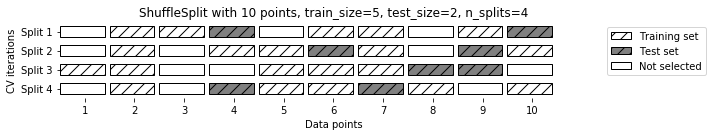

In [32]:
# 打乱划分交叉验证 每次划分为训练集取样train_size个点，测试集取样test_size个(不相交)点
# 将这一方法重复n_iter次
mglearn.plots.plot_shuffle_split()

In [33]:
# 可以设置train_size和test_size为整数来表示集合的绝对大小，也可为浮点数表示占总的比例
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.94666667 0.98666667 0.97333333 0.94666667 0.96       0.96
 0.94666667 0.97333333 0.93333333 0.97333333]


In [34]:
# 打乱划分交叉验证允许每次迭代仅使用部分数据，设置train_size和test_size之和小于1，
# 这种方法对数据进行二次采样可能对大型数据集上的试验很有用
# 打乱划分交叉验证还有一个分层的形式StratifiedShuffleSpilt为分类任务提供更可靠的结果

In [35]:
# 分组交叉验证 划分时将属于同一组的数据作为一个整体，但这个组与类别标签无关
# GroupFold 它以groups数组作为参数表示数据中的分组，创建训练集和测试集时不应该将其分开
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


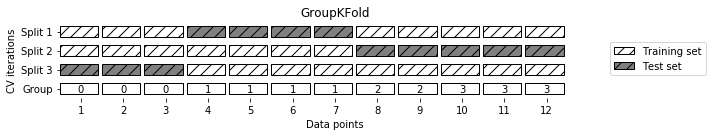

In [36]:
mglearn.plots.plot_group_kfold()

In [37]:
# -----------------------------------------------------------------------
# 网格搜索 找到一个模型的重要参数取值是一项棘手的任务，网格搜索尝试参数的所有可能组合
# 所有可能的参数组合形成了参数设置表(网格)

In [38]:
# 简单的网格搜索，遍历所有组合
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    random_state=0)
print("Size of training set:{} \nSize of test set:{}".format(X_train.shape[0],
                                                            X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Size of training set:112 
Size of test set:38
Best score:0.97
Best parameters:{'C': 100, 'gamma': 0.001}


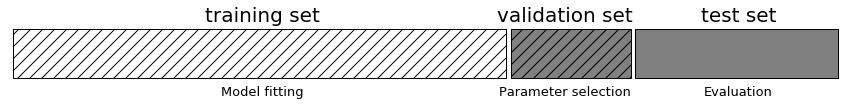

In [39]:
# 参数过拟合的风险和验证
# 由于我们使用测试数据进行调参，所以不能再用它们来评估模型的精度，需要一个独立的数据集
# 用于构建模型的训练集，用于选择模型参数的验证集(开发集)、用于评估性能的测试集
mglearn.plots.plot_threefold_split()

In [41]:
# 利用验证集选定最佳参数后，使用最佳参数构建新模型，但是要在训练数据和验证数据上进行训练
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target,
                                                   random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval,
                                                     random_state=1)
print("Size of traing set:{} \nSize of validation set:{} \nSize of test set:{}".
     format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:", best_parameters)
print("Test set score with best parameters:{:.2f}".format(test_score))

Size of traing set:84 
Size of validation set:28 
Size of test set:38
Best score on validation set:0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters:0.92


In [42]:
# 任何根据测试集精度所做的选择都会把测试集的信息“泄露”到模型中，因此保留一个单独的测试集
# 是很重要的，它仅用于最终评估

In [43]:
# 带交叉验证的网格搜索 
# 虽然讲数据划分为训练集、验证集和测试集的方法是可行的，也行对常用，但这种方法
# 对数据的划分方法相当敏感，为了得到对泛化性能的更好估计，我们可以使用交叉验证来评估
# 每种参数组合的性能，而不是仅将数据单次划分为训练集和验证集

In [44]:
import numpy as np

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:", best_parameters)
print("Test set score with best parameters:{:.2f}".format(test_score))


Best score on validation set:0.97
Best parameters: {'C': 10, 'gamma': 0.1}
Test set score with best parameters:0.97


In [45]:
# 使用5折交叉验证对6个C和6个gamma组合进行模型训练，一共需要训练6×6×5=180个模型
# 使用交叉验证的主要缺点就是时间开销比较大

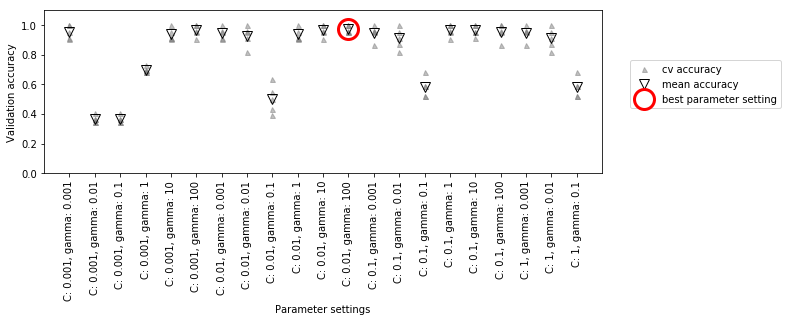

In [47]:
# 带交叉验证的网格搜索结果展示
mglearn.plots.plot_cross_val_selection()

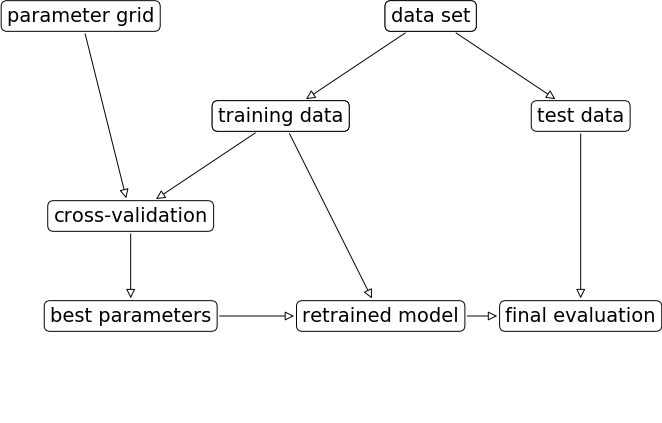

In [54]:
# 交叉验证通常与网格搜索方法结合使用，因此许多人使用交叉验证来指代带交叉验证的网格搜索
mglearn.plots.plot_grid_search_overview()

In [57]:
# 由于带交叉验证的网格搜索是一种常用的调参方法，因此scikit-learn提供了
# GridSearchCV估计器来实现这种方法，首先需要用一个字典指定要搜索的参数，
# 字典的键是我们要调节的参数名称，字典的值时要尝试的参数

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
# 使用5折分层交叉验证+网格搜索
# GridSearchCV使用交叉验证代替之前用过的划分训练集和验证集，但仍需要划分训练集和测试集
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   random_state=0)
# GridSearchCV对象不仅会搜索最佳参数，还会利用得到最佳交叉验证的参数在整个训练集上
# 自动拟合一个新模型
grid_search.fit(X_train, y_train)
print("Test set score:{:.2f}".format(grid_search.score(X_test, y_test)))

Test set score:0.97


In [61]:
# GridSearchCV找到的参数保存在best_params_属性中，交叉验证最佳精度保存在best_score_中
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score:{:.2f}".format(grid_search.best_score_))

Best parameters:{'C': 10, 'gamma': 0.1}
Best cross-validation score:0.97


In [62]:
# best_score_是在训练集上进行交叉验证得到的，而score()方法采用的是在整个训练集上的模型
# 可以使用best_estimator_属性来访问最佳参数对应的模型，它是在整个训练集上训练得到的
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [65]:
# 由于grid_search本身具有predict和score方法，所以不需要使用best_estimator_来进行了
grid_search.best_estimator_.score(X_test, y_test)

0.9736842105263158

In [69]:
# 网格搜索的结果保存在cv_results_属性中，它是一个字典，其中保存了搜索的所有内容
# 将交叉验证的结果可视化
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
display(results.head(5))

,mean_fit_time,mean_score_time,mean_test_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
0,0.000798,0.000199,0.366403,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.347826,0.347826,0.363636,0.363636,0.409091,0.000399,0.000399,0.022485
1,0.000599,0.000199,0.366403,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.347826,0.347826,0.363636,0.363636,0.409091,0.000489,0.000399,0.022485
2,0.000394,0.000609,0.366403,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.347826,0.347826,0.363636,0.363636,0.409091,0.000483,0.000498,0.022485
3,0.000393,0.000606,0.366403,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.347826,0.347826,0.363636,0.363636,0.409091,0.000481,0.000495,0.022485
4,0.000791,0.000199,0.366403,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.347826,0.347826,0.363636,0.363636,0.409091,0.000396,0.000399,0.022485


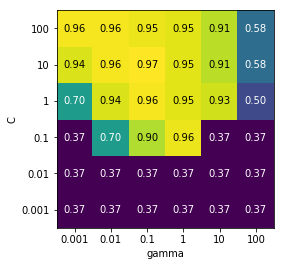

In [72]:
# 平均验证分数可视化热图
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

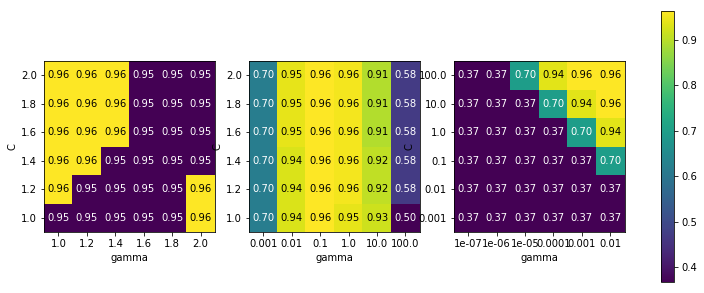

In [75]:
# 热图中的每个点对应于运行一次交叉验证以及一种特定的参数设置，颜色表示交叉验证的精度
# 要注意的是参数的范围要足够大，每个参数的最佳取值不能位于图像的边界上
# 错误的搜索网格可视化
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C':np.linspace(1, 2, 6), 'gamma':np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, 
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', xticklabels=param_grid['gamma'],
        ylabel='C', yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

In [79]:
# 在非网格的空间中搜索 在某些情况下尝试所有参数的所有可能组合并不是一个还主意
# GridSearchCV的param_grid可以是字典组成的列表，列表中的每个字典可扩展为一个独立的网格
param_grid = [
    {'kernel':['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
     'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grid:\n{}".format(param_grid))

List of grid:
[{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}, {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}]


In [82]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score:{:.2f}".format(grid_search.best_score_))

Best parameters:{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score:0.97


In [85]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000798082,0.00059824,0.000199032,0.000798082,0.000397682,0.000393391,0.000398493,0.000592756,0.000598383,0.000598383,...,0.000404835,0.000997496,0.000797653,0.000803375,0.000797892,0.000193977,0.000404549,0.000199413,0.000592899,0.000997353
mean_score_time,0.000199223,0.000199366,0.00040493,0.000199604,0.000194883,0.000398922,0.000604486,0,0.000392771,0,...,0,0,0.000199461,0.000199509,0,0,0,0.000398874,0,0
mean_test_score,0.366403,0.366403,0.366403,0.366403,0.366403,0.366403,0.366403,0.366403,0.366403,0.366403,...,0.954941,0.946245,0.911067,0.581423,0.366403,0.838735,0.955336,0.973123,0.972727,0.955336
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
rank_test_score,27,27,27,27,27,27,27,27,27,27,...,11,13,18,24,27,21,8,1,3,8
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,0.956522,0.869565,0.521739,0.347826,0.869565,1,1,1,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1,0.956522


In [86]:
# 使用不同的交叉验证策略进行网格搜索，与cross_val_score类似，GridSearchCV对分类问题
# 默认使用分层k折交叉验证，对回归问题默认k折交叉验证，也可以传入任何交叉验证分离器作为
# cv参数，如果只想将数据单次划分为训练集和验证集，还可以使用ShuffleSpilt
# 或StratifiedShufflesolit并设置n_iter=1，这对非常大的数据集或非常慢的模型可能有帮助

In [87]:
# 嵌套交叉验证 将原始数据使用交叉验证进行多次划分，对于每次划分都运行一次网格搜索，然后
# 对于每种外层划分利用最佳参数设置计算得到测试集分数，这一过程的结果是由分数组成的列表，
# 不是一个模型，也不是一种参数设置，这些分数告诉我们在网格找到的最佳参数下模型的泛化能力，
# 嵌套交叉验证不提供可用于新数据的模型，所以在寻找可用于预测未来数据的模型时很好用到它

In [91]:
# 调用cross_val_score，并使用GridSearchCV的一个势力作为模型实现嵌套交叉验证
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, 
                        iris.target, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score: 0.9666666666666668


In [103]:
# 内层循环和外层循环都用了分层5折交叉验证，param_grid包含36种参数组合，构建了900个模型，
# 这导致嵌套交叉验证过程的代价很高，可以在外层和内层循环中使用不同的交叉验证分离器
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_parms = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores=[]
            for inner_train, inner_test in inner_cv.split(X[training_samples],
                                                         y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_parms = parameters
    clf = Classifier(**best_parms)
    clf.fit(X[training_samples], y[training_samples])
    outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [106]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
    StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.]


In [105]:
# 交叉验证与网格搜索并行 虽然在许多参数或大型数据集上运行网格搜索的计算量很搭，但是这些
# 计算都是并行的，这使得网格搜索与交叉验证成为多个CPU内核或集群上并行化的理想选择，可以
# 将n_jbos设置为你想使用的CPU内核数量，可以设置为-1来使用所有可用内核，但scikit-learn
# 不允许并行操作的嵌套，如果在模型中使用了n_jobs，那么就不能再GridSearchCV使用它来搜索
# 这个模型，使用多个内核也可能会占用大量内存
# 可以在集群内的多台机器上并行运行网格搜索和交叉验证，但scikit-learn不支持，Spark可以

In [108]:
# ---------------------------------------------------------------------
# 评估指标与评分
# 除了常用的精度来评估分类性能，R²来评估回归性能，还有很多评估指标可选择使用
# 我们通常不仅对精确的预测感兴趣，还希望将这些预测结果用于最大的决策过程，在选择机器学习
# 指标之前，应该考虑应用的高级目标，这常用被称为商业指标，对于一个机器学习应用，选择特定
# 算法的结果被称为商业影响，找到与原始商业目标最接近的可评估的指标很有用，尽可能使用这种
# 最接近的指标进行模型评估与选择

In [109]:
# 二分类指标  对于二分类我们通常会说正类和反类，正类是我们要寻找的类
# 错误类型：错误的正类预测(假正例)也叫第一类错误，错误的反类预测(假反例)也叫第二类错误
# 不平衡数据集 一个类别比另外一个类别出现次数非常多的数据集，也叫具有不平衡类别的数据集

In [110]:
# 构建一个不平衡数据集
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, 
                                                    random_state=0)


In [111]:
# 使用DummyClassifier来始终预测多数类(这里是不是9的)
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels:{}".format(np.unique(pred_most_frequent)))
print("Test score:{:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels:[False]
Test score:0.90


In [113]:
# 上边的模型精度90%，但却没有学到任何内容，仅能预测一个类别
# 使用决策树进行分类
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score:{:.2f}".format(tree.score(X_test, y_test)))

Test score:0.92


In [137]:
# 使用逻辑回归进行预测
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score:{:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score:{:.2f}".format(logreg.score(X_test, y_test)))

dummy score:0.80
logreg score:0.98


d:\pyenv\ml3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [119]:
# 产生随机输出的虚拟分类器是精度最低的，但也超过了80%，很难判断哪些结果是无意义的
# 精度并不能很好地度量这一情况

In [138]:
# 混淆矩阵 对二分类问题的评估结果，一种全面的表示方式是使用混淆矩阵(confusion matrix)
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


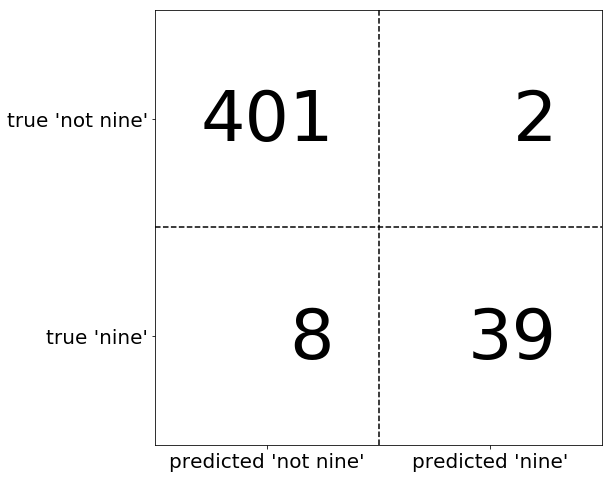

In [133]:
# confusion_matrix的输出是一个2×2的数组，其中行对应于真是的类别，列对应于预测的类别
# 混淆矩阵主对角线上的元素对应于正确的分类，其他元素表示一个类别中有多少样本被错误地划分
# 混淆矩阵说明
mglearn.plots.plot_confusion_matrix_illustration()

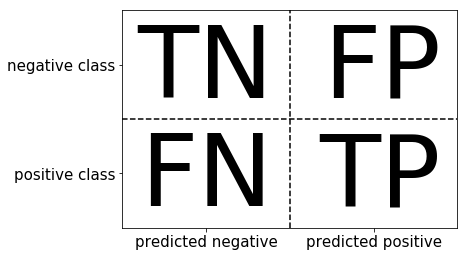

In [134]:
# 将“9”作为正类，非“9”作为反类
# 正类中正确分类的样本叫真正例(true positive) 错误分类的叫假反例(false negative)
# 反类中正确分类的样本叫真反例(true negative)  错误分类叫假正例(false positive)
mglearn.plots.plot_binary_confusion_matrix()

In [140]:
print("Most frequent class:\n", confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:\n", confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:\n", confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression:\n",confusion_matrix(y_test, pred_logred))

Most frequent class:
 [[403   0]
 [ 47   0]]

Dummy model:
 [[357  46]
 [ 40   7]]

Decision tree:
 [[390  13]
 [ 24  23]]

Logistic Regression:
 [[402   1]
 [  6  41]]


In [141]:
# 精度计算公式： Accuracy = (TP + TN) / (TP + TN + FP + FN)

In [142]:
# 准确率 度量的是被预测为正例的样本中有多少是真正的正例  Precision = TP / (TP + FP)
# 准确率也叫阳性预测值(PPV)，当目标是限制假正例的数量时可使用准确率作为指标

In [143]:
# 召回率 度量的是正类样本中有多少被预测为正类  Recall = TP / (TP + FN)
# 召回率也叫灵敏度、命中率、真正例率(TPR)，当需要找出所有正类样本时可使用召回率作为指标

In [144]:
# 在优化召回率和准确率之间需要折中，召回率完美(全预测为正类)，则准确率会很低
# 准确率完美(预测最确定的为正类，其余全为反类)，则召回率会很差

In [150]:
# f1-分数(f1-度量) 是准确率和召回率的调和平均 是f-分数的一个特定变种
# F = 2 × (ecision × Recall) / (Precision + Recall)

In [149]:
# 对于不平衡的二分类数据集，f1-score比精度度量更好
from sklearn.metrics import f1_score

print("f1 score most frequent:{:.2f}".format(f1_score(y_test, 
                                            pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
                                        f1_score(y_test, pred_logreg)))

f1 score most frequent:0.00
f1 score dummy: 0.14
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [151]:
# f-分数似乎比精度更符合我们对模型的直觉，但是它比精度更加难以解释

In [153]:
# scikit-learn的classification_report可以同时计算准确率、召回率、f1-分数
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, 
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [158]:
# classification_report函数(分类报告)为每个类别生成一行，并给出以该类别作为正类的准确
# 率、召回率、f-分数，support是该类别中真实样本数量，weighted avg是对应指标的加权平均

In [155]:
print(classification_report(y_test, pred_dummy, 
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.89      0.89       403
        nine       0.13      0.15      0.14        47

    accuracy                           0.81       450
   macro avg       0.52      0.52      0.52       450
weighted avg       0.82      0.81      0.81       450



In [157]:
print(classification_report(y_test, pred_logreg, 
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [159]:
# 考虑不确定性
# 大多数的分类器都提供了一个decision_function或predict_proba方法来评估预测的不确定度
# 预测可以看作是以某个固定点作为decision_function或perdict_proba输出的阈值，二分类中
# 使用0作为决策函数的阈值，0.5作为predict_proba的阈值

In [186]:
from mglearn.datasets import make_blobs

# 创建一个不平衡二分类数据集，反类400个点，正类50个点
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],
                 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

d:\pyenv\ml3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


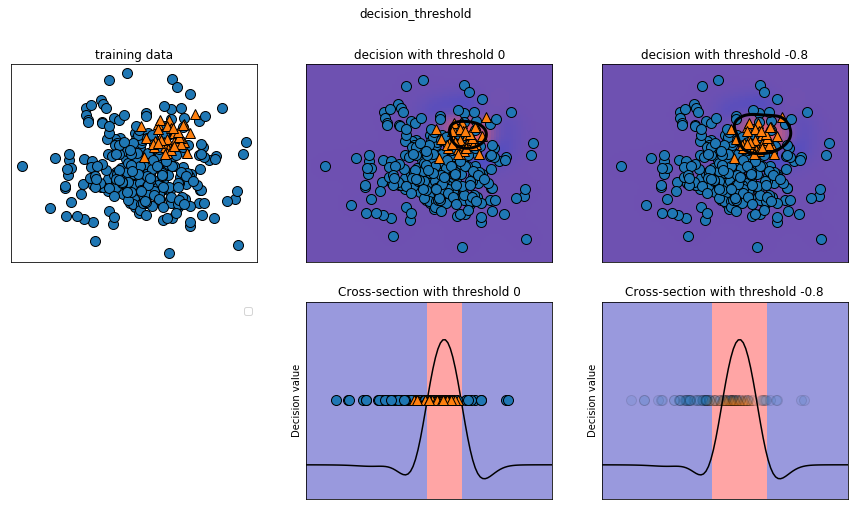

In [187]:
mglearn.plots.plot_decision_threshold()

In [188]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [198]:
# 为了提高召回率，需要将更多地点换分为1，尝试减小decision_function阈值
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [199]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [201]:
# 类别1的召回率增大了，准确率减小，可见改变决策阈值是得到更好结果的最简单方法
# 不要在测试集上设置阈值，可以使用验证集或交叉验证来代替，否则结果可能过于乐观
# 对于实现了predict_proba方法的模型来说，选择阈值更简单，因为其输出固定在0~1，表示概率

In [202]:
# 准确率-召回率曲线
# 对分类器设置要求(比如90%的召回率)通常称为设置工作点，开发新模型时，通常并不知道工作点
# 在哪里，利用准确率-召回率曲线可以很好查看所有可能的阈值或准确率和召回率的所有可能折中

d:\pyenv\ml3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


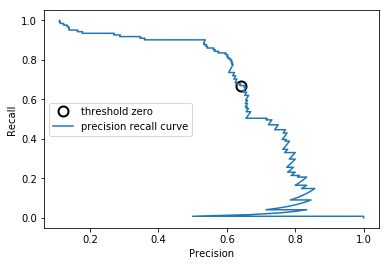

In [210]:
from sklearn.metrics import precision_recall_curve

X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], 
                 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
# precision_recall_curve输入真实标签和预测的不确定度，输出有序列表[阈值、准确率、召回率]
precision, recall, thresholds = precision_recall_curve(y_test, 
                                    svc.decision_function(X_test))
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='center left')

In [211]:
# 准确率-召回率曲线越靠近右上角，则分类器越好

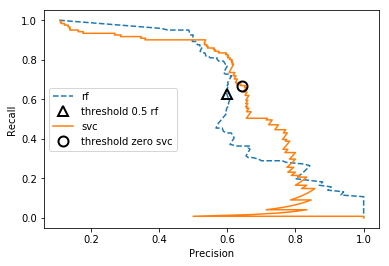

In [214]:
# 比较同一数据集上训练的SVM和随机森林
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_features=2, random_state=0)
rf.fit(X_train, y_train)
# 随机森林没有decision_function方法，但是有predict_proba
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test,
                                            rf.predict_proba(X_test)[:,1])
plt.plot(precision_rf, recall_rf, '--', label="rf")
close_zero_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_zero_rf], recall_rf[close_zero_rf], '^', c='k',
        markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)

plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='center left')

In [215]:
# 可以看出随机森林在极值处(要求很高召回率或准确率)的表现更好，SVM在中间位置表现更好,
# 只看f1-分数无法发现这些细节，f1-分数只反应了准确率-召回率曲线上默认阈值对应的这一个点
print("f1_score of random forestL{:.3f}".format(f1_score(y_test, 
                                            rf.predict(X_test))))
print("f1_score of svc:{:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forestL0.610
f1_score of svc:0.656


In [216]:
# 平均准确率 是一种总结准确率-召回率曲线的方法，它计算曲线下的积分或面积
# 可以使用average_precision_score函数来计算平均准确率
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest:{:.3f}".format(ap_rf))
print("Average precision of svc:{:.3f}".format(ap_svc))

Average precision of random forest:0.660
Average precision of svc:0.666


In [217]:
# 受试者工作特征(ROC)与AUC
# 受试者工作特征曲线，简称ROC曲线，是一种可以分析不同阈值的分类器行为的常用工具
# 它显示的是假正例率(FPR)和真正例率(TPR)，而不是报告准确率和召回率，真正例率就是召回率，
# 假正例率是假正例占所有反类样本的比例   FRP = FP / (FP + TN)

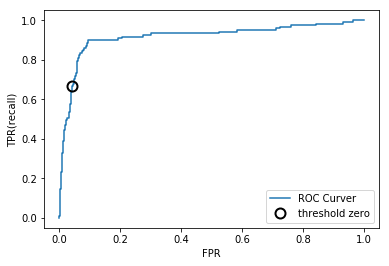

In [224]:
# 绘制ROC曲线
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curver")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, 
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [225]:
# ROC曲线越靠近左上角越好，召回率高同时假正例率低
# 与默认阈值0相比，我们可以得到明显更高的召回率，而FPR仅稍有增加
# 需要注意的是，不要在测试集上选择阈值，而应该在单独的验证集上选择

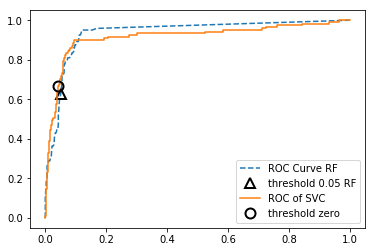

In [229]:
# 随机森林和SVM的ROC曲线对比
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf, '--', label="ROC Curve RF")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
        label="threshold 0.05 RF", fillstyle="none", c='k', mew=2)
plt.plot(fpr, tpr, label="ROC of SVC")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, 
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [230]:
# AUC 是一种总结ROC曲线的方法，它计算曲线下的面积，可以被解释为评估正例样本的排名
# 可以试用roc_auc_score函数来计算ROC曲线下的面积
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest:{:.3f}".format(rf_auc))
print("AUC for SVC:{:.3f}".format(svc_auc))

AUC for Random Forest:0.937
AUC for SVC:0.916


gamma = 1.00 accuracy = 0.90 auc = 0.50
gamma = 0.09 accuracy = 0.90 auc = 0.97
gamma = 0.01 accuracy = 0.90 auc = 1.00


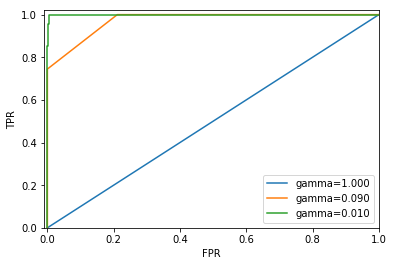

In [239]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, 
                                                    random_state=0)
plt.figure()
for gamma in [1, 0.09, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} auc = {:.2f}".format(
            gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend()

In [240]:
# 对于三种不同的gamma设置，其精度是相同的，但是明显gamma=0.01时，AUC接近完美(等于1),
# 这意味着根据决策函数，所有正类的点排名要高于所有反类点，日过仅使用精度评估，则无法发现
# 在不平衡数据上评估模型使用AUC是很好的选择，但AUC未使用默认阈值，可能还需要调节决策阈值

In [241]:
# 多分类指标
# 多分类的精度被定义为正确分类的样本所占的比例

In [249]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                   random_state=0)
lr = LogisticRegression(max_iter=3000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy:{:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy:0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


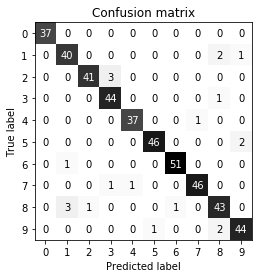

In [252]:
# 绘制混淆矩阵更直观展示
score_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), 
    xlabel="Predicted label", ylabel="True label", xticklabels=digits.target_names, 
        yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [253]:
# 对于第一个类别(数字0),它包含37个样本，因为第一行所有列都为0，所以全部被划分为类别0，
# 而别的类别都多多少少存在假反例，如2个1被划分为8,1个1呗划分为9
# 利用classification_report函数，我们可以计算每个类别的准确率、召回率、f-分数
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [254]:
# 对于多分类问题中的不平衡数据集，最常用的指标就是多分类版本的f-分数，多分类f-分数
# 背后的想法是对每个类别计算一个二分类f-分数，其中该类是正类，其他所有类为反类，然后使用
# 以下策略之一对这些按类别f-分数进行平均：
# 宏(macro)平均：计算未加权的按类别f-分数，它对所有类别给出相同的权重，无论类别中样本量
# 加权(weighted)平均：以每个类别的支持(样本个数)作为权重计算按类别f-分数的平均值，
# 分类报告中给出的就是这个值
# 微(micro)平均：计算所有类别中假正例、假反例和真正例的总数，
# 然后利用这些计数来计算准确率、召回率、f1-分数
# 如果对每个样本等同看待，那推荐使用微平均f1-分数，对每个类别等同看待，推荐宏平均f1分数

In [257]:
print("Micro average f1 score:{:.3f}".format(f1_score(y_test, pred, 
                                                average="micro")))
print("Macro average f1 score:{:.3f}".format(f1_score(y_test, pred,
                                                average="macro")))

Micro average f1 score:0.953
Macro average f1 score:0.954


In [259]:
# 回归指标  一般来说R²是评估回归模型更直观的指标，有时也会根据均方误差或平均绝对误差

In [260]:
# 在模型选择中使用评估指标，scikit-learn在使用GridSearchCV和cross_val_score
# 进行模型选择时，可以使用scoring参数设置想要使用的评估指标

In [262]:
# 分类问题的默认评分是精度
print("Default scoring:{}".format(cross_val_score(SVC(), digits.data, 
                                        digits.target==9)))
# 指定scoring="accuracy"不会改变结果
print("Accuracy scoring:{}".format(cross_val_score(SVC(), digits.data, 
                                        digits.target==9, scoring="accuracy")))
# 指定使用auc
print("AUC scoring:{}".format(cross_val_score(SVC(), digits.data, 
                                        digits.target==9, scoring="roc_auc")))

Default scoring:[0.975      0.99166667 1.         0.99442897 0.98050139]
Accuracy scoring:[0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring:[0.99717078 0.99854252 1.         0.999828   0.98400413]


In [265]:
# 在GridSearchCV中设置评分指标
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                    digits.target==9, random_state=0)
param_grid = {'gamma':[0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with sccuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score(accuracy):{:.3f}".format(grid.best_score_))
print("Test set AUC:{:.3f}".format(roc_auc_score(y_test, 
                                    grid.decision_function(X_test))))
print("Test set accuracy:{:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with sccuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score(accuracy):0.976
Test set AUC:0.992
Test set accuracy:0.973


In [268]:
# 使用AUC评分
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("Grid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score(AUC):{:.3f}".format(grid.best_score_))
print("Test set AUC:{:.3f}".format(roc_auc_score(y_test, 
                                    grid.decision_function(X_test))))
print("Test set accuracy:{:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score(AUC):0.998
Test set AUC:1.000
Test set accuracy:1.000


In [271]:
# 对于分类问题，scoring参数最重要的取值包括：accuracy(精度，默认值)，roc_auc(ROC曲线
# 下方的面积)，average_precision(准确率-召回率曲线下方的面积)，f1，f1_macro，
# f1_micro，f1_weighted
# 对于回归问题，常用的参数包括：r²(R²分数)，mean_squared_error(均方误差)，
# mean_absolute_error(平均绝对误差)
# 可以在metrics.scorer模块定义的SCORER字典中查看所有支持的参数
from sklearn.metrics.scorer import SCORERS

print("Available scorers:\{}".format(sorted(SCORERS.keys())))

Available scorers:\['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']
